In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dt = np.dtype([('instance_no', int),
               ('exp_no', int),
               ('method', int), # 1 = white box, 2 = euclidean_PCA, 3 = hog, 4 = euclidean_PCA category, 5 = hog category, 6 = ais
               ('pca_n', int),
               ('percentage_of_data', float),
               ('percentile', float),
               ('mc_euclidean_no_batches', int), # stuff
               ('mc_hog_no_batches', int), # stuff
               ('sigma_ais', float),
               ('mc_attack_log', float),
               ('mc_attack_eps', float),
               ('mc_attack_frac', float), 
               ('mc_attack_log_50', float), 
               ('mc_attack_eps_50', float),
               ('mc_attack_frac_50', float),
               ('white_box_50', float),
               ('white_box_11', float),
               ('ais_50', float),
               ('ais_acc_rate_50', float),
              ])

In [101]:
data = pd.DataFrame(np.loadtxt('CONSOLIDATED_MC_ATTACKS_MNIST.csv', dtype=dt))

# ais sign correction
data.loc[data.method == 6,('ais_50')] = 1-data[data.method == 6].ais_50
#data.loc[data.method == 1,('white_box_50')] = 1-data[data.method == 1].white_box_50

data = data.assign(mem_inf_adv_mc_log = lambda x: (x.mc_attack_log_50-0.5)*2)
data = data.assign(mem_inf_adv_mc_ones = lambda x: (x.mc_attack_eps_50-0.5)*2)
data = data.assign(mem_inf_adv_wb = lambda x: (x.white_box_50-0.5)*2)
data = data.assign(mem_inf_adv_ais = lambda x: (x.ais_50-0.5)*2)

def convert_to_set_prob(x):
    prob = np.zeros((len(x),))
    for i in range(len(x)):
        if x[i] > 0:
            prob[i] = 1
        elif x[i] == 0:
            prob[i] = 0.5
        elif x[i] < 0:
            prob[i] = 0
    return prob

data = data.assign(set_accuracy_mc_log = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_log))
data = data.assign(set_accuracy_mc_ones = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_ones))
data = data.assign(set_accuracy_wb = lambda x: convert_to_set_prob(x.mem_inf_adv_wb))
data = data.assign(set_accuracy_ais = lambda x: convert_to_set_prob(x.mem_inf_adv_ais))

data = data.assign(set_mem_inf_adv_mc_log = lambda x: 2*x.set_accuracy_mc_log-1)
data = data.assign(set_mem_inf_adv_mc_ones = lambda x: 2*x.set_accuracy_mc_ones-1)
data = data.assign(set_mem_inf_adv_wb = lambda x: 2*x.set_accuracy_wb-1)
data = data.assign(set_mem_inf_adv_ais = lambda x: 2*x.set_accuracy_ais-1)

white_box = data[data.method == 1]
pca_cat = data[data.method == 4]
hog_cat = data[data.method == 5]



In [102]:
data = pd.DataFrame(np.loadtxt('AIS_SIGMA_0.025.csv', dtype=dt))

# ais sign correction
data.loc[data.method == 6,('ais_50')] = 1-data[data.method == 6].ais_50
#data.loc[data.method == 1,('white_box_50')] = 1-data[data.method == 1].white_box_50

data = data.assign(mem_inf_adv_mc_log = lambda x: (x.mc_attack_log_50-0.5)*2)
data = data.assign(mem_inf_adv_mc_ones = lambda x: (x.mc_attack_eps_50-0.5)*2)
data = data.assign(mem_inf_adv_wb = lambda x: (x.white_box_50-0.5)*2)
data = data.assign(mem_inf_adv_ais = lambda x: (x.ais_50-0.5)*2)

def convert_to_set_prob(x):
    prob = np.zeros((len(x),))
    for i in range(len(x)):
        if x[i] > 0:
            prob[i] = 1
        elif x[i] == 0:
            prob[i] = 0.5
        elif x[i] < 0:
            prob[i] = 0
    return prob

data = data.assign(set_accuracy_mc_log = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_log))
data = data.assign(set_accuracy_mc_ones = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_ones))
data = data.assign(set_accuracy_wb = lambda x: convert_to_set_prob(x.mem_inf_adv_wb))
data = data.assign(set_accuracy_ais = lambda x: convert_to_set_prob(x.mem_inf_adv_ais))

data = data.assign(set_mem_inf_adv_mc_log = lambda x: 2*x.set_accuracy_mc_log-1)
data = data.assign(set_mem_inf_adv_mc_ones = lambda x: 2*x.set_accuracy_mc_ones-1)
data = data.assign(set_mem_inf_adv_wb = lambda x: 2*x.set_accuracy_wb-1)
data = data.assign(set_mem_inf_adv_ais = lambda x: 2*x.set_accuracy_ais-1)

ais = data[data.method == 6]



# White Box

In [103]:
len(white_box)

155

In [104]:
print(white_box.mem_inf_adv_wb.mean())
print(white_box.set_mem_inf_adv_wb.mean())
print(white_box.set_accuracy_wb.mean())

-0.002193548387096765
0.025806451612903226
0.5129032258064516


# AIS

In [105]:
print(ais.mem_inf_adv_ais.mean())
print(ais.set_accuracy_ais.mean())

0.0032432432432432583
0.5540540540540541


# PCA per Category
0.1 mc_attack_log_50

In [106]:
pca_cat.groupby(['percentile']).mean()[['mc_attack_log_50','mc_attack_eps_50']]*100

,mc_attack_log_50,mc_attack_eps_50
percentile,,
-1.00,52.716129,52.716129
0.01,49.993548,50.064516
0.10,51.316129,50.961290
1.00,52.458065,52.354839


In [107]:
means_pca_gan = pca_cat.groupby(['percentile']).mean()[['set_accuracy_mc_log','set_accuracy_mc_ones']]*100
means_pca_gan

,set_accuracy_mc_log,set_accuracy_mc_ones
percentile,,
-1.00,74.838710,74.838710
0.01,47.419355,51.612903
0.10,64.838710,59.677419
1.00,74.838710,71.935484


In [108]:
std_pca_gan = pca_cat.groupby(['percentile']).std()[['set_accuracy_mc_log','set_accuracy_mc_ones']]/np.sqrt(pca_cat.groupby(['percentile']).count()[['set_accuracy_mc_log','set_accuracy_mc_ones']])*100
std_pca_gan

,set_accuracy_mc_log,set_accuracy_mc_ones
percentile,,
-1.00,3.248350,3.248350
0.01,3.768365,3.757951
0.10,3.694848,3.776783
1.00,3.312207,3.396808


In [109]:
means_pca_gan['set_accuracy_mc_log'].map(lambda x: "{:.2f}".format(x))+'$\pm$'+std_pca_gan['set_accuracy_mc_log'].map(lambda x: "{:.2f}".format(x)) + ' & '+means_pca_gan['set_accuracy_mc_ones'].map(lambda x: "{:.2f}".format(x))+'$\pm$'+std_pca_gan['set_accuracy_mc_ones'].map(lambda x: "{:.2f}".format(x))+' & '

percentile
-1.00    74.84$\pm$3.25 & 74.84$\pm$3.25 & 
 0.01    47.42$\pm$3.77 & 51.61$\pm$3.76 & 
 0.10    64.84$\pm$3.69 & 59.68$\pm$3.78 & 
 1.00    74.84$\pm$3.31 & 71.94$\pm$3.40 & 
dtype: object

In [110]:
pca_cat.groupby(['percentile']).count()[['set_accuracy_mc_log','set_accuracy_mc_ones']]

,set_accuracy_mc_log,set_accuracy_mc_ones
percentile,,
-1.00,155,155
0.01,155,155
0.10,155,155
1.00,155,155


In [111]:
pca_cat_opt_perc = pca_cat[pca_cat.percentile == -1]
print(len(pca_cat_opt_perc))

print(pca_cat_opt_perc.mem_inf_adv_mc_log.mean())
print(pca_cat_opt_perc.mem_inf_adv_mc_ones.mean())

print(pca_cat_opt_perc.set_accuracy_mc_ones.mean())
print(pca_cat_opt_perc.set_accuracy_mc_log.mean())

#print(len(pca_opt_perc[pca_opt_perc.mc_attack_log_50>0.5])/len(pca_opt_perc))
#print(len(pca_opt_perc[pca_opt_perc.mc_attack_eps_50>0.5])/len(pca_opt_perc))

155
0.054322580645161316
0.054322580645161316
0.7483870967741936
0.7483870967741936


# Histogram of Gradients (HOG) per category
0.01 Epsilon Method?

In [112]:
hog_cat.groupby(['percentile']).mean()[['mc_attack_log_50','mc_attack_eps_50']]*100

,mc_attack_log_50,mc_attack_eps_50
percentile,,
-1.00,51.510067,51.510067
0.01,51.295302,51.255034
0.10,51.255034,51.201342
1.00,50.926174,50.892617


In [113]:
means_hog_gan = hog_cat.groupby(['percentile']).mean()[['set_accuracy_mc_log','set_accuracy_mc_ones']]*100
means_hog_gan

,set_accuracy_mc_log,set_accuracy_mc_ones
percentile,,
-1.00,63.758389,63.758389
0.01,63.758389,66.107383
0.10,63.758389,62.080537
1.00,60.067114,59.731544


In [114]:
std_hog_gan = hog_cat.groupby(['percentile']).std()[['set_accuracy_mc_log','set_accuracy_mc_ones']]/np.sqrt(hog_cat.groupby(['percentile']).count()[['set_accuracy_mc_log','set_accuracy_mc_ones']])*100
std_hog_gan

,set_accuracy_mc_log,set_accuracy_mc_ones
percentile,,
-1.00,3.834832,3.834832
0.01,3.684054,3.696631
0.10,3.714699,3.646689
1.00,3.838402,3.858962


In [115]:
means_hog_gan['set_accuracy_mc_log'].map(lambda x: "{:.2f}".format(x))+'$\pm$'+std_hog_gan['set_accuracy_mc_log'].map(lambda x: "{:.2f}".format(x)) + ' & '+means_hog_gan['set_accuracy_mc_ones'].map(lambda x: "{:.2f}".format(x))+'$\pm$'+std_hog_gan['set_accuracy_mc_ones'].map(lambda x: "{:.2f}".format(x))+' & '

percentile
-1.00    63.76$\pm$3.83 & 63.76$\pm$3.83 & 
 0.01    63.76$\pm$3.68 & 66.11$\pm$3.70 & 
 0.10    63.76$\pm$3.71 & 62.08$\pm$3.65 & 
 1.00    60.07$\pm$3.84 & 59.73$\pm$3.86 & 
dtype: object

In [116]:
means_hog_gan

,set_accuracy_mc_log,set_accuracy_mc_ones
percentile,,
-1.00,63.758389,63.758389
0.01,63.758389,66.107383
0.10,63.758389,62.080537
1.00,60.067114,59.731544


In [117]:
hog_cat.groupby(['percentile']).count()[['set_accuracy_mc_log','set_accuracy_mc_ones']]

,set_accuracy_mc_log,set_accuracy_mc_ones
percentile,,
-1.00,149,149
0.01,149,149
0.10,149,149
1.00,149,149


In [118]:
hog_cat_opt_perc = hog_cat[hog_cat.percentile == -1]

print(hog_cat_opt_perc.mem_inf_adv_mc_log.mean())
print(hog_cat_opt_perc.mem_inf_adv_mc_ones.mean())

print(hog_cat_opt_perc.set_mem_inf_adv_mc_log.mean())
print(hog_cat_opt_perc.set_accuracy_mc_ones.mean())

0.030201342281879217
0.030201342281879217
0.2751677852348993
0.6375838926174496


In [119]:
def calc_error(data):
    return data.std()/np.sqrt(len(data))

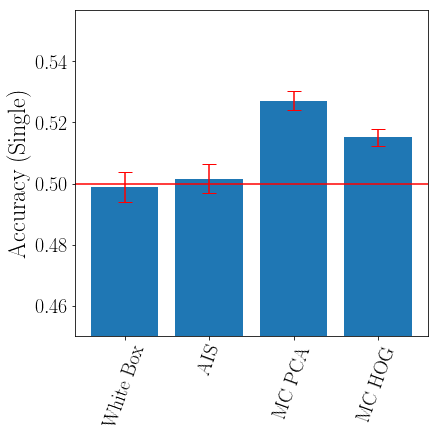

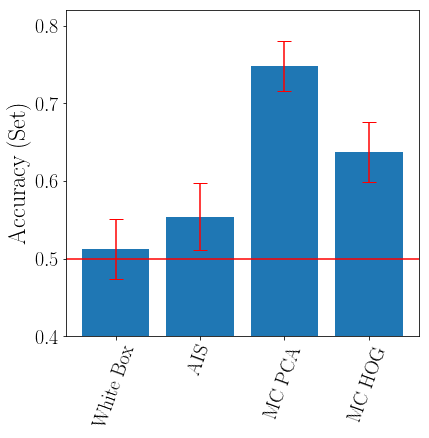

In [121]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 20})

f = plt.figure(figsize=(7, 7))
ax = plt.subplot()

names = ['White Box', 'AIS','MC PCA', 'MC HOG']
N = len(names)
ind = np.arange(N)

y = [white_box.white_box_50.mean(), 
                               ais.ais_50.mean(), 
                               #pca_opt_perc.mc_attack_log_50.mean(),
                               #pca_opt_perc.mc_attack_eps_50.mean(),
                               #hog_opt_perc.mc_attack_log_50.mean(),
                               #hog_opt_perc.mc_attack_eps_50.mean(),
                               #pca_cat_opt_perc.mc_attack_log_50.mean(),
                               pca_cat_opt_perc.mc_attack_eps_50.mean(),
                               #hog_cat_opt_perc.mc_attack_log_50.mean(),
                               hog_cat_opt_perc.mc_attack_eps_50.mean()]

rects1 = ax.bar(ind,  y)

e = [calc_error(white_box.white_box_50), 
                               calc_error(ais.ais_50), 
                               #calc_error(pca_opt_perc.mc_attack_log_50), 
                               #calc_error(pca_opt_perc.mc_attack_eps_50), 
                               #calc_error(hog_opt_perc.mc_attack_log_50), 
                               #calc_error(hog_opt_perc.mc_attack_eps_50),
                               #calc_error(pca_cat_opt_perc.mc_attack_log_50), 
                               calc_error(pca_cat_opt_perc.mc_attack_eps_50), 
                               #calc_error(hog_cat_opt_perc.mc_attack_log_50), 
                               calc_error(hog_cat_opt_perc.mc_attack_eps_50)]

np.save('y_single_cgan',y)
np.save('e_single_cgan',e)

plt.errorbar(ind, y, e, color='r', linestyle='None', capsize=7)


plt.ylim(ymin=0.45)
plt.axhline(y=0.5, color='r', linestyle='-')

plt.ylabel('Accuracy (Single)', fontsize='large')

ax.set_xticks(ind)
plt.setp(ax.get_xticklabels(), rotation='70')

ax.set_xticklabels(names)

plt.tight_layout(pad=2, w_pad=2, h_pad=2)

f = plt.figure(figsize=(7, 7))
ax = plt.subplot()

ind = np.arange(N)

y = [white_box.set_accuracy_wb.mean(), 
                               ais.set_accuracy_ais.mean(), 
                               #pca_opt_perc.set_accuracy_mc_log.mean(),
                               #pca_opt_perc.set_accuracy_mc_ones.mean(),
                               #hog_opt_perc.set_accuracy_mc_log.mean(),
                               #hog_opt_perc.set_accuracy_mc_ones.mean(),
                               #pca_cat_opt_perc.set_accuracy_mc_log.mean(),
                               pca_cat_opt_perc.set_accuracy_mc_ones.mean(),
                               #hog_cat_opt_perc.set_accuracy_mc_log.mean(),
                               hog_cat_opt_perc.set_accuracy_mc_ones.mean()]
rects1 = ax.bar(ind, y)

e = [calc_error(white_box.set_accuracy_wb), 
                               calc_error(ais.set_accuracy_ais), 
                               #calc_error(pca_opt_perc.set_accuracy_mc_log), 
                               #calc_error(pca_opt_perc.set_accuracy_mc_ones), 
                               #calc_error(hog_opt_perc.set_accuracy_mc_log), 
                               #calc_error(hog_opt_perc.set_accuracy_mc_ones),
                               #calc_error(pca_cat_opt_perc.set_accuracy_mc_log), 
                               calc_error(pca_cat_opt_perc.set_accuracy_mc_ones), 
                               #calc_error(hog_cat_opt_perc.set_accuracy_mc_log), 
                               calc_error(hog_cat_opt_perc.set_accuracy_mc_ones)]

np.save('y_set_cgan',y)
np.save('e_set_cgan',e)

plt.errorbar(ind, y, e, color='r', linestyle='None', capsize=7)

plt.ylabel('Accuracy (Set)', fontsize='large')

plt.ylim(ymin=0.4)
plt.axhline(y=0.5, color='r', linestyle='-')

ax.set_xticks(ind)
plt.setp(ax.get_xticklabels(), rotation='70')
ax.set_xticklabels(names)

plt.tight_layout(pad=2, w_pad=2, h_pad=2)
plt.savefig('GAN_MNIST_Mem_Inf_10_Perc.pgf', bbox_inches="tight")
    
plt.show()

In [122]:
print(len(pca_cat_opt_perc))
print(len(hog_cat_opt_perc))
print(len(ais))
print(len(white_box))

155
149
111
155
